```
# Copyright 2022 by the author(s) of CHI2023 submission "Short-Form
# Videos Degrade Our Capacity to Retain Intentions: Effect of Context
# Switching On Prospective Memory". All rights reserved.
#
# Use of this source code is governed by a GPLv3 license that
# can be found in the LICENSE file.
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'''\usepackage{libertine}\usepackage{fontawesome5}\usepackage[dvipsnames]{xcolor}'''
plt.rcParams['ps.usedistiller'] = 'xpdf'
import seaborn as sns
sns.set_theme(style='ticks')

In [2]:
df_rt = pd.read_csv('data/rt.csv')

In [3]:
def draw_reaction_time(axes, task, ylim=(0, 33)):
   interrupts = ['rest', 'twitter', 'youtube', 'tiktok']
   measures = ['pre', 'post']

   # draw the distributions
   colors = sns.color_palette('vlag', as_cmap=False, n_colors=10)
   for j, measure in enumerate(measures):
      for i, interrupt in enumerate(interrupts):
         data = df_rt[(df_rt.task == task) & (df_rt.success == True) & (df_rt.interrupt == interrupt) & (df_rt.measure == measure)]
         sns.histplot(
            ax=axes[j][i],
            data=data, stat='count',
            x='rt', hue='correct', hue_order=[True, False],
            fill=True, common_norm=False, alpha=.3, linewidth=0.8, bins=15, binwidth=.1, kde=True,
            palette=[colors[0], colors[-1]],
         )

   # configure axes
   for i in range(4):
      axes[0][i].set_xlim(0.25, 2.5)
      axes[1][i].set_xlim(0.25, 2.5)
      axes[0][i].set_ylim(ylim)
      axes[1][i].set_ylim(ylim)
      axes[0][i].set_xticklabels([])
      axes[1][i].set_xticks(axes[1][i].get_xticks().tolist())
      axes[1][i].set_xticklabels([f'{x * 1000:.0f}' for x in axes[1][i].get_xticks()])
      axes[0][i].set_xlabel(None)
      axes[1][i].set_xlabel('RTs (ms)')

   for i in range(4):
      if i == 0:
         axes[0][i].set_ylabel('Density (Pre-Interruption)')
         axes[1][i].set_ylabel('Density (Post-Interruption)')
         axes[0][i].set_yticks(axes[0][i].get_yticks().tolist())
         axes[1][i].set_yticks(axes[1][i].get_yticks().tolist())
         axes[0][i].set_yticklabels([f'{y / ylim[1]:.1f}' for y in axes[0][0].get_yticks()])
         axes[1][i].set_yticklabels([f'{y / ylim[1]:.1f}' for y in axes[1][0].get_yticks()])
      else:
         axes[0][i].set_ylabel(None)
         axes[1][i].set_ylabel(None)
         axes[0][i].set_yticklabels([])
         axes[1][i].set_yticklabels([])

   breaks = ['\\faSpinner~Rest', '\\faTwitter~Twitter', '\\faYoutube~YouTube', '\\faTiktok~TikTok']
   colors = ['#000000', '#000000', '#000000', '#000000']
   for i, inter in enumerate(breaks):
      axes[0][i].set_title(inter, fontsize=14, y=1.05, color=colors[i])

   for i in range(4):
      if i == 3:
         axes[1][i].legend([]).remove()
         g = axes[0][3].get_legend()
         g.set_frame_on(False)
         g.set_title(False)
         for t, l in zip(g.texts, ['Correct', 'Error']):
            t.set_text(l)
      else:
         axes[0][i].legend([]).remove()
         axes[1][i].legend([]).remove()

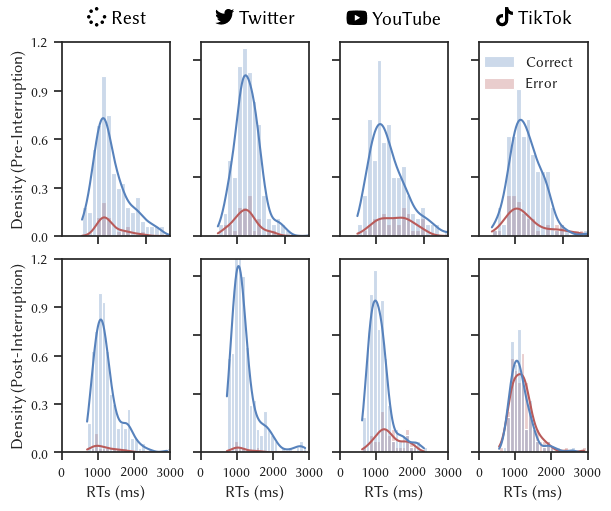

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(6, 5), constrained_layout=True)
draw_reaction_time(axes, 'PM')
plt.savefig('figures/fig3_rt_accuracy_pm.pdf', bbox_inches='tight', dpi=300)

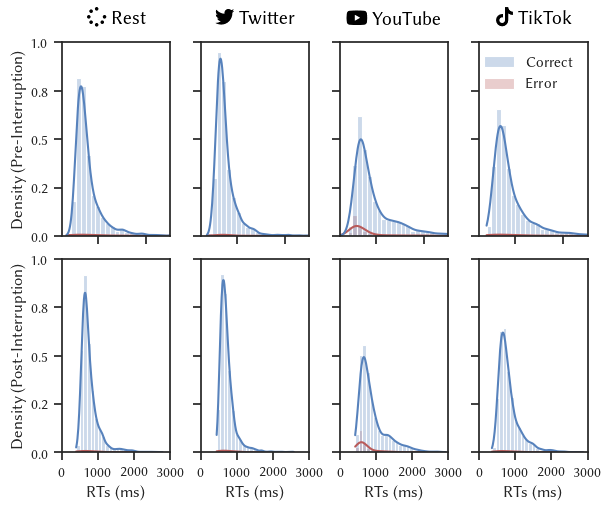

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(6, 5), constrained_layout=True)
draw_reaction_time(axes, 'LD', ylim=(0, 800))
plt.savefig('figures/fig3_rt_accuracy_ld.pdf', bbox_inches='tight', dpi=300)

/tmp/ipykernel_1510428/1541885932.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0, 20, 40, 60, 80, 100])


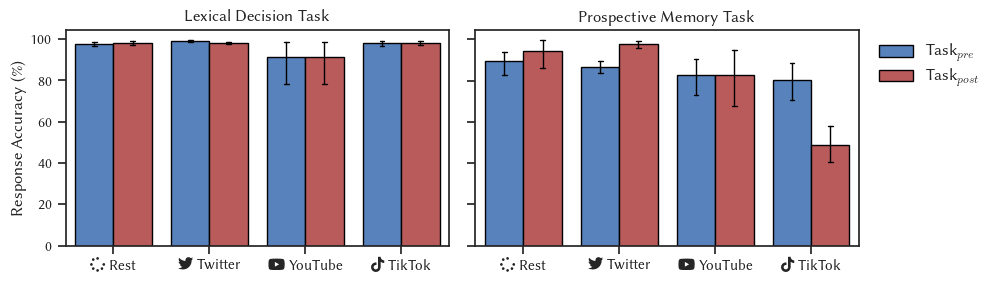

In [10]:
df_accuracy = pd.read_csv('data/acc.csv')
tasks = ['\\faSpinner~Rest', '\\faTwitter~Twitter', '\\faYoutube~YouTube', '\\faTiktok~TikTok']
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
colors = sns.color_palette('vlag', as_cmap=False, n_colors=10)
sns.barplot(ax=ax[0], x='interrupt', y='accuracy', hue='measure', data=df_accuracy[df_accuracy.task == 'LD'], order=['rest', 'twitter', 'youtube', 'tiktok'], palette=[colors[0], colors[-1]], saturation=1, errwidth=1, capsize=0.05, errcolor='black', linewidth=1, edgecolor='black')
sns.barplot(ax=ax[1], x='interrupt', y='accuracy', hue='measure', data=df_accuracy[df_accuracy.task == 'PM'], order=['rest', 'twitter', 'youtube', 'tiktok'], palette=[colors[0], colors[-1]], saturation=1, errwidth=1, capsize=0.05, errcolor='black', linewidth=1, edgecolor='black')

ax[0].get_legend().remove()
ax[1].legend(loc='upper right', bbox_to_anchor=(1.35, 1), ncol=1, frameon=False, title='', title_fontsize=12, fontsize=12)
legend_texts = ['Task$_{pre}$', 'Task$_{post}$']
ax[1].get_legend().get_texts()[0].set_text(legend_texts[0])
ax[1].get_legend().get_texts()[1].set_text(legend_texts[1])

ax[0].set_yticklabels([0, 20, 40, 60, 80, 100])
ax[1].set_yticklabels([])

ax[0].set_title('Lexical Decision Task')
ax[1].set_title('Prospective Memory Task')
ax[0].set_ylabel('Response Accuracy (\%)')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_xticklabels(tasks)
ax[1].set_xticklabels(tasks)

plt.tight_layout()
plt.savefig('figures/fig4_accuracy.pdf', bbox_inches='tight', dpi=300)